In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv(r"D:\Deep Learning 100 days\Day_09_Gradient_Descent\Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df[['Age','EstimatedSalary','Purchased']]

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [10]:
X_scaled.shape

(400, 2)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
#batch size is 400 same as X_scaled--->batch GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,y,epochs=10,batch_size=400,validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7188 - loss: 0.6334 - val_accuracy: 0.5125 - val_loss: 0.6956
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7250 - loss: 0.6225 - val_accuracy: 0.5125 - val_loss: 0.6954
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.7312 - loss: 0.6150 - val_accuracy: 0.5250 - val_loss: 0.6953
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7344 - loss: 0.6090 - val_accuracy: 0.5250 - val_loss: 0.6951
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7344 - loss: 0.6038 - val_accuracy: 0.5375 - val_loss: 0.6949
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.7344 - loss: 0.5991 - val_accuracy: 0.5500 - val_loss: 0.6946
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7437 - loss: 0.5949 - val_accuracy: 0.5625 - val_loss: 0.6944
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.7531 - loss: 0.5909 - val_accuracy: 0.5625 - val_loss: 0.

In [15]:
#now let's check for the stochastic GD
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_scaled,y,epochs=10,batch_size=1,validation_split=0.2)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7707 - loss: 0.5266 - val_accuracy: 0.6625 - val_loss: 0.6725
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7705 - loss: 0.4337 - val_accuracy: 0.7250 - val_loss: 0.6251
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8176 - loss: 0.3593 - val_accuracy: 0.7750 - val_loss: 0.5658
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8527 - loss: 0.3590 - val_accuracy: 0.8000 - val_loss: 0.5147
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - loss: 0.2826 - val_accuracy: 0.7875 - val_loss: 0.4540
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8814 - loss: 0.2589 - val_accuracy: 0.8375 - val_loss: 0.4045
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8460 - loss: 0.2778 - val_accuracy: 0.8875 - val_loss: 0.3686
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3241 - val_accuracy: 0.

In [16]:
#therefore Stochastic converge faster bcoz more number of updates

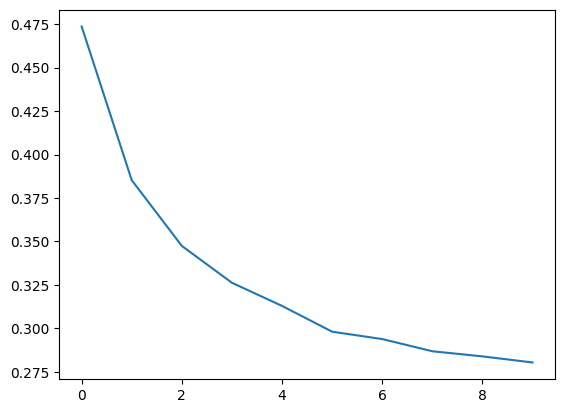

In [17]:
#plotted the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])